# Concrete Strength Prediction

### Problem Statement

Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

### Feature Description

    Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
    Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
    Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
    Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
    Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
    Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
    Age -- quantitative -- Day (1~365) -- Input Variable
    Concrete Compressive Strength -- quantitative -- MPa -- Output Variable



### Importing Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

#### Steps
1) Read the dataset.<br>
2) Handle Null values (if any).<br>
3) Handle dupliacte records (if any)<br>
4) Plot Pairplot<br>
5) Plot heatmap for correlation<br>
6) Handle upper and lower outliers at 3 and 97 percentile<br>
7) Split the data into training and test data with test size as 25%.<br>
8) Standardize the data(independent features) using StandardScaler<br>
9) Create Linear_Reg,Ridge_Reg,Lasso_Reg models and generate their prediction result.(Use alpha value in Ridge and Lasso)<br>
10) Also compute MSE,MAE,RMSE,R2_score for each of these models.


### Reading the dataset.

In [94]:
df = pd.read_csv('Concrete_Data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the Dataset

In [95]:
df1=df.copy()
df1.shape

(1030, 9)

In [96]:
df1.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

### Checking for Data Types

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [98]:
df1.dtypes.value_counts()

float64    8
int64      1
dtype: int64

#### 1. For getting the statistical summary of numerical variables we use the describe()

In [99]:
df1.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the slag ranges from 0 to 359.40, with mean 73.895825

### Checking for null values & duplicate records

In [100]:
nv=df1.isnull().sum()
nv

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [101]:
df1.duplicated().sum()

25

In [102]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

In [103]:
df1.drop_duplicates(inplace=True)

In [104]:
df1.shape

(1005, 9)

### Analyzing the Data

In [105]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())


cement
251.4    15
446.0    14
310.0    14
331.0    13
250.0    13
         ..
236.9     1
184.0     1
336.0     1
260.0     1
260.9     1
Name: cement, Length: 278, dtype: int64

slag
0.0      470
189.0     16
24.0      14
20.0      12
145.0     11
        ... 
112.0      1
17.6       1
237.0      1
120.0      1
100.5      1
Name: slag, Length: 185, dtype: int64

flyash
0.0      541
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
87.0       1
166.0      1
133.0      1
134.0      1
78.3       1
Name: flyash, Length: 156, dtype: int64

water
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
195.4      1
211.5      1
175.8      1
200.3      1
200.6      1
Name: water, Length: 195, dtype: int64

superplasticizer
0.0     378
8.0      27
11.6     23
7.0      19
6.0      17
       ... 
15.3      1
20.0      1
1.9       1
4.0       1
12.7      1
Name: superplasticizer, Length: 111, dtype: int64

coarseaggregate
932.0     57
852.1     35
968.0     

### Univariate Data Analysis

#### Boxplots

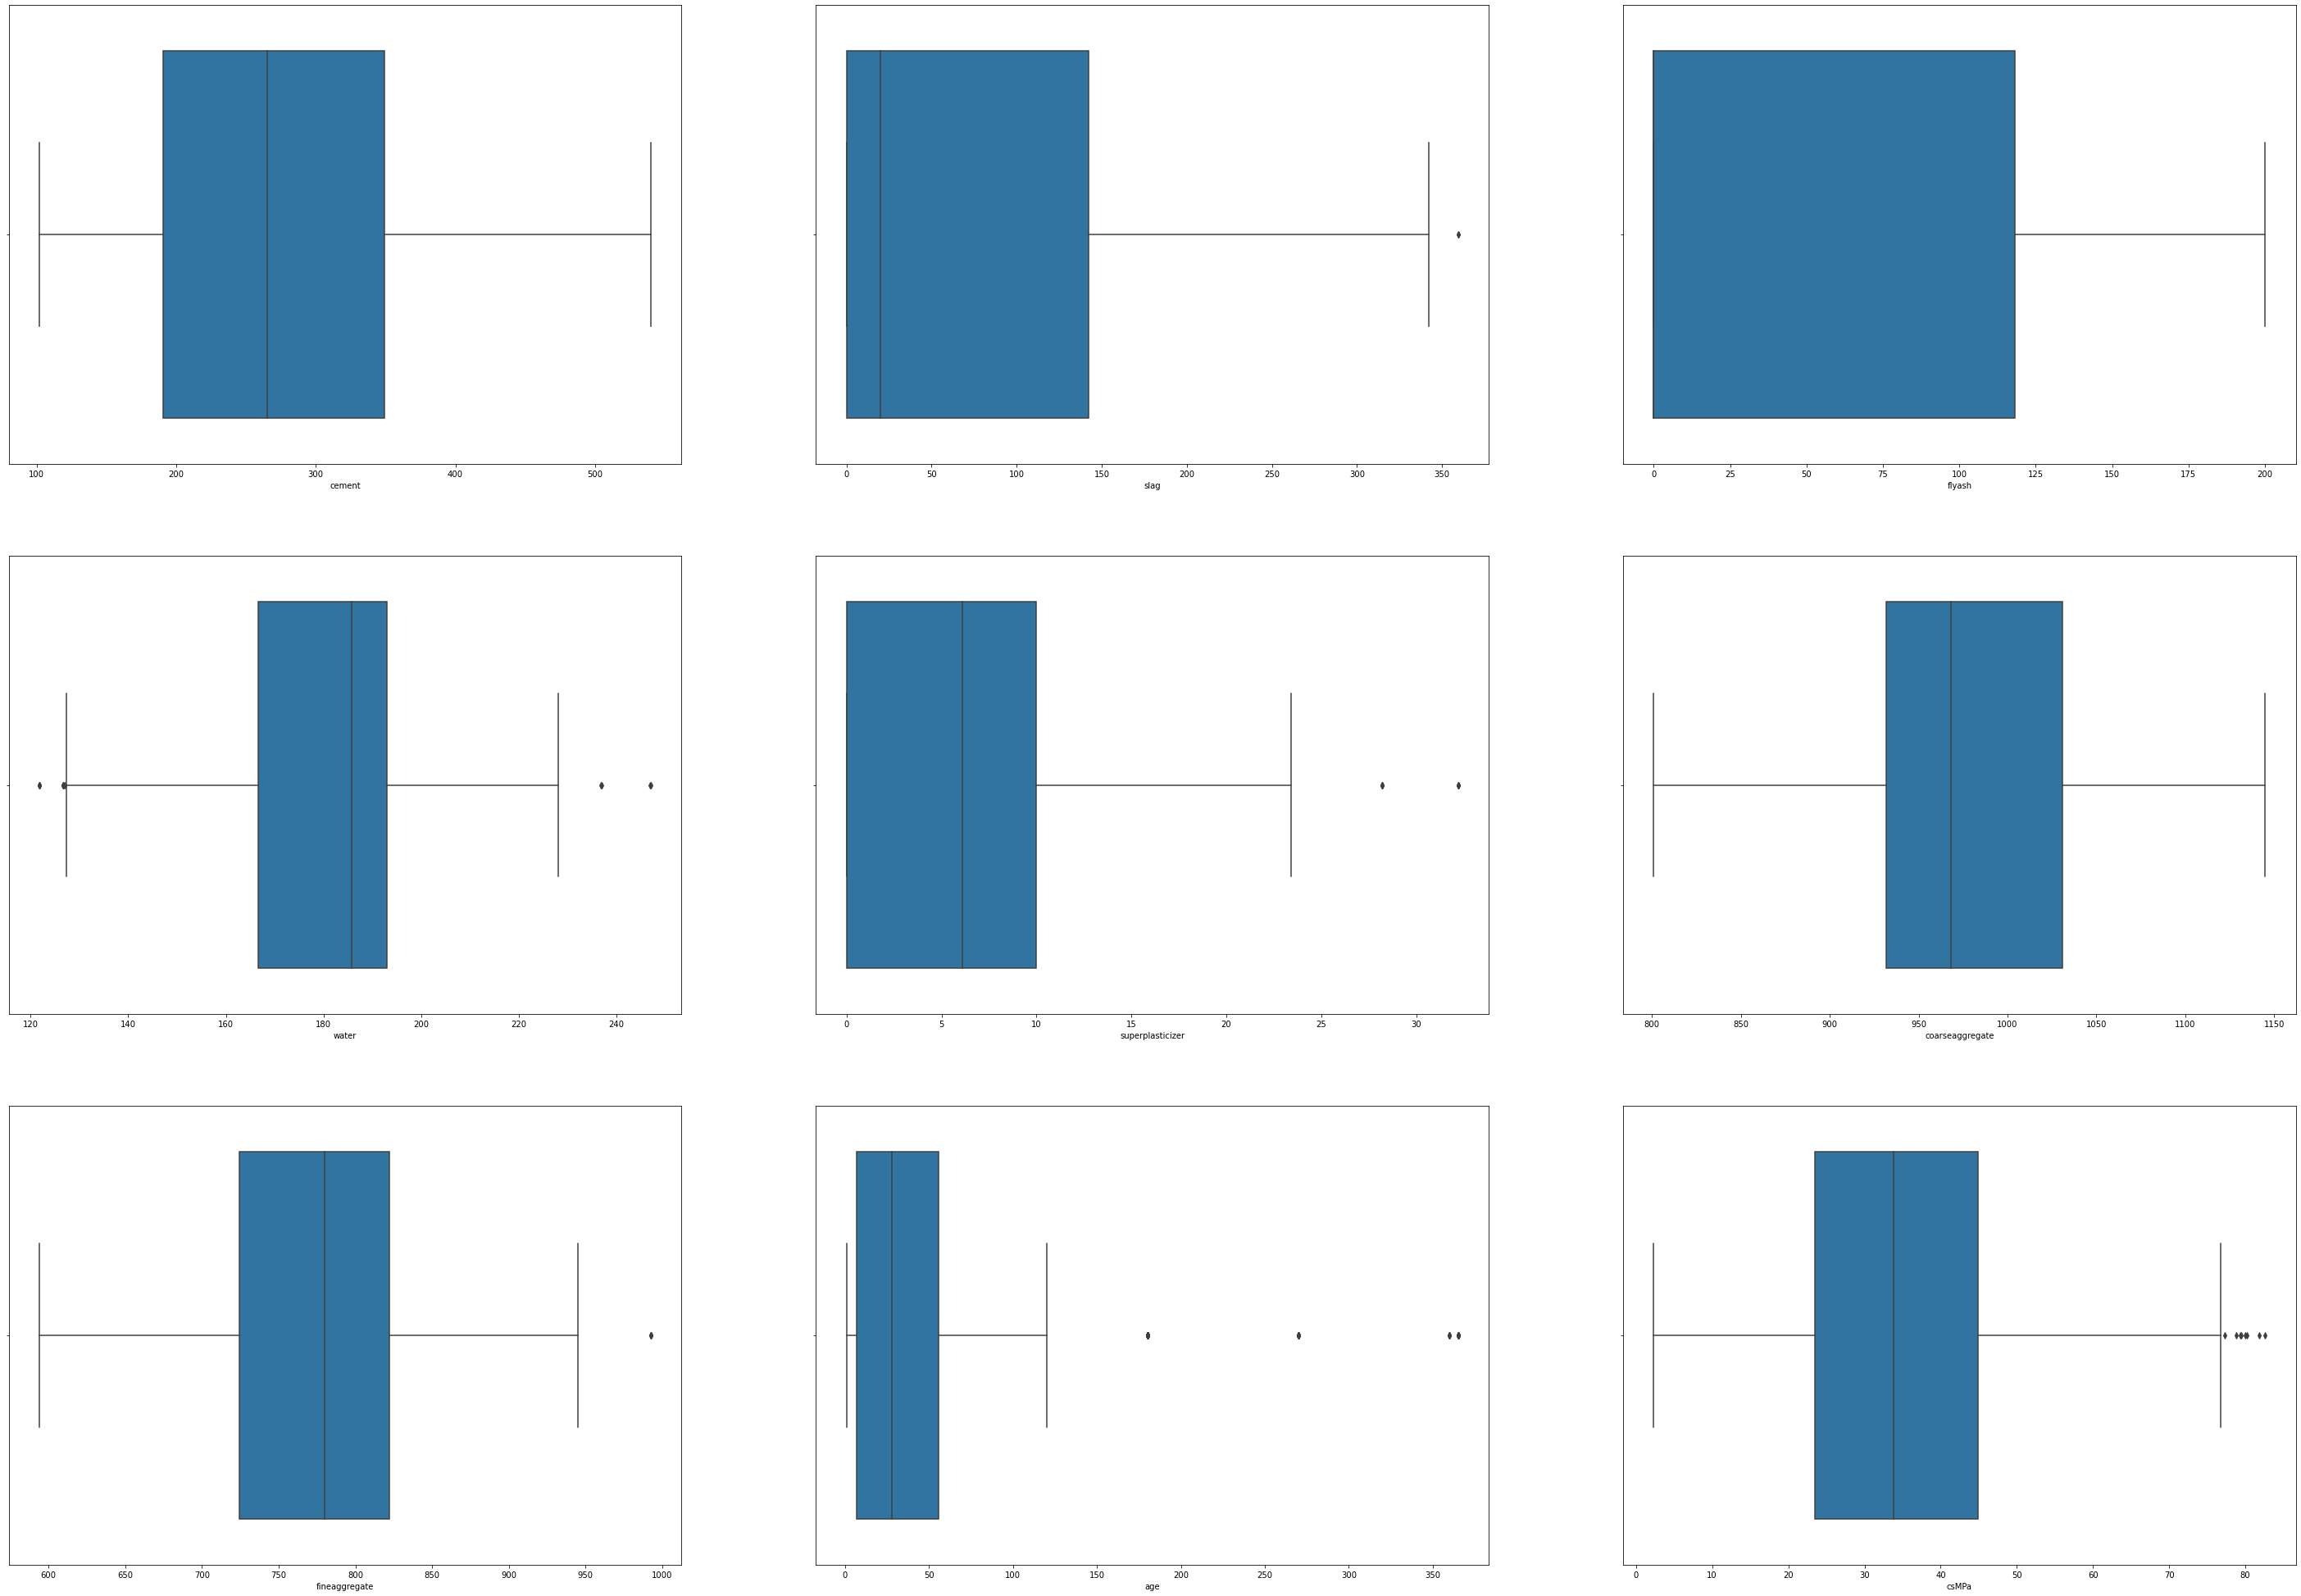

In [106]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (50, 35))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1, ax.flatten()):
    sns.boxplot(df1[variable], ax = subplot)

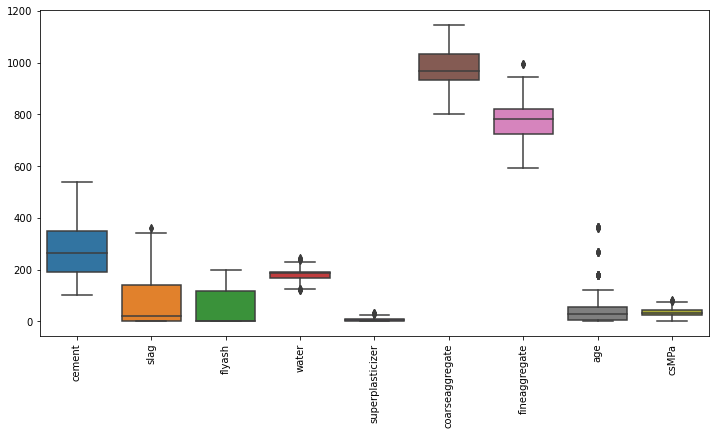

In [107]:
plt.subplots(figsize=(12, 6))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()

#### Inference
- From above boxplots we can see that slag, water, superplasticizer, fineaggregate, age, csMPa are the columns with outliers.

#### Histogram

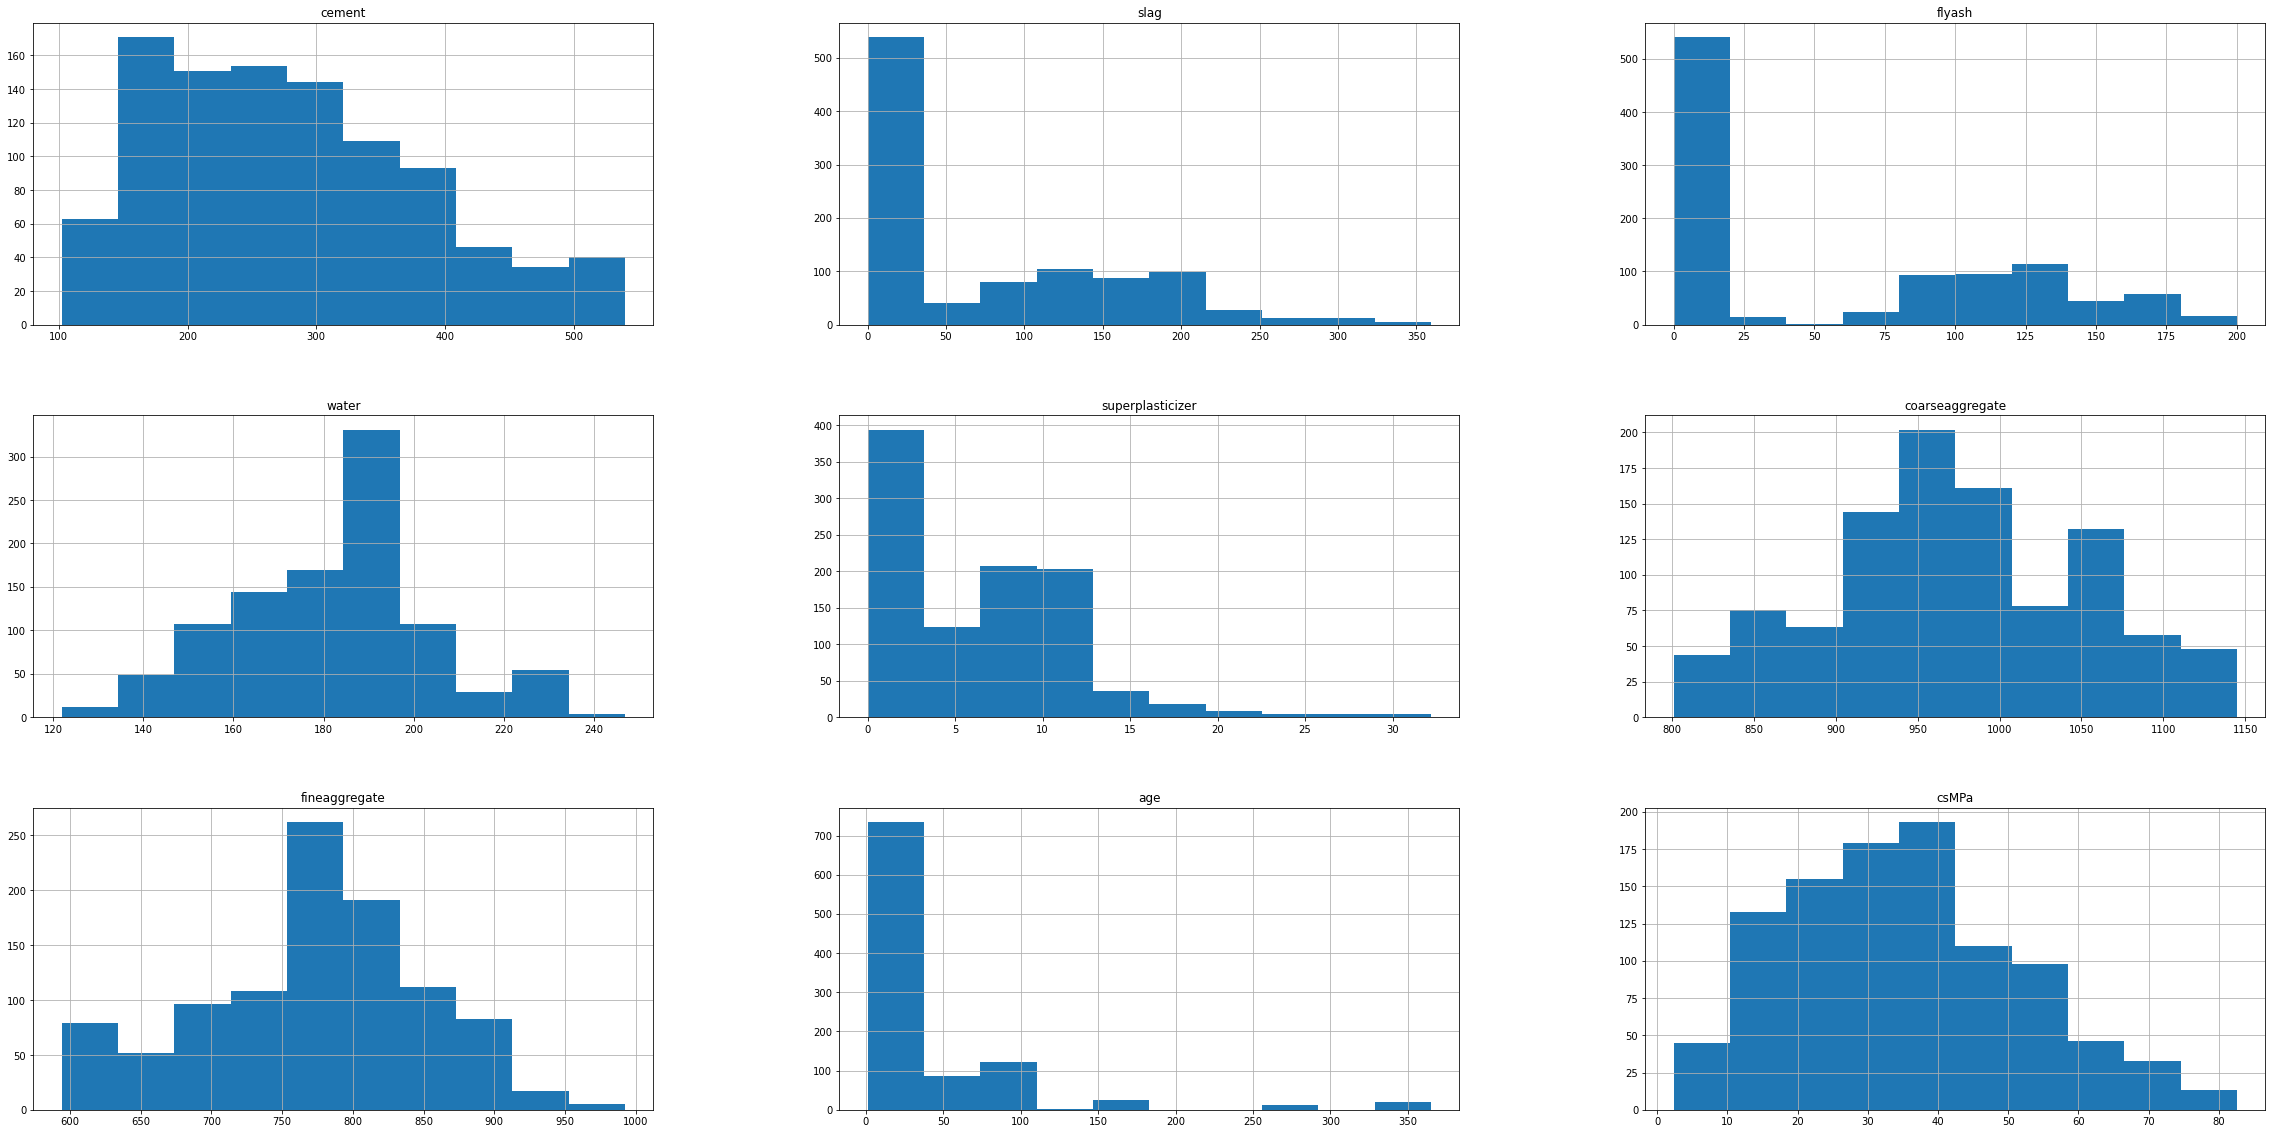

In [108]:
a=df1.hist(figsize=(40,20))

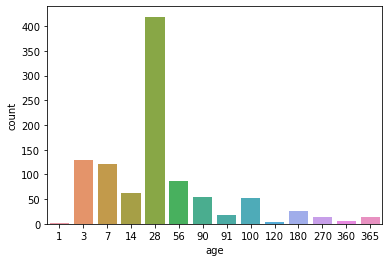

In [109]:
sns.countplot(x=df1['age'])
plt.show()

In [110]:
from scipy.stats import skew

In [111]:
df1.skew(axis = 0, skipna = True)

cement              0.564959
slag                0.855225
flyash              0.497231
water               0.034433
superplasticizer    0.980604
coarseaggregate    -0.065256
fineaggregate      -0.252353
age                 3.253974
csMPa               0.395696
dtype: float64

### Understanding the target variable

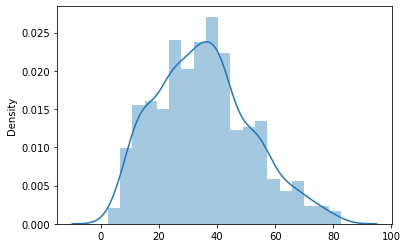

In [112]:
sns.distplot(x=df1['csMPa'])
plt.show()

### Inference
Data is kind off normally distributed. 


### Checking for Normality

In [113]:
from scipy.stats import shapiro

In [114]:
w1_stat, p1 = shapiro(df1['csMPa'])
print('Stat1',w1_stat,'p1-value',p1)

Stat1 0.9817423224449158 p1-value 6.64015231688353e-10


### Bivariate Data Analysis

#### Checking the pairwise relations of Features.

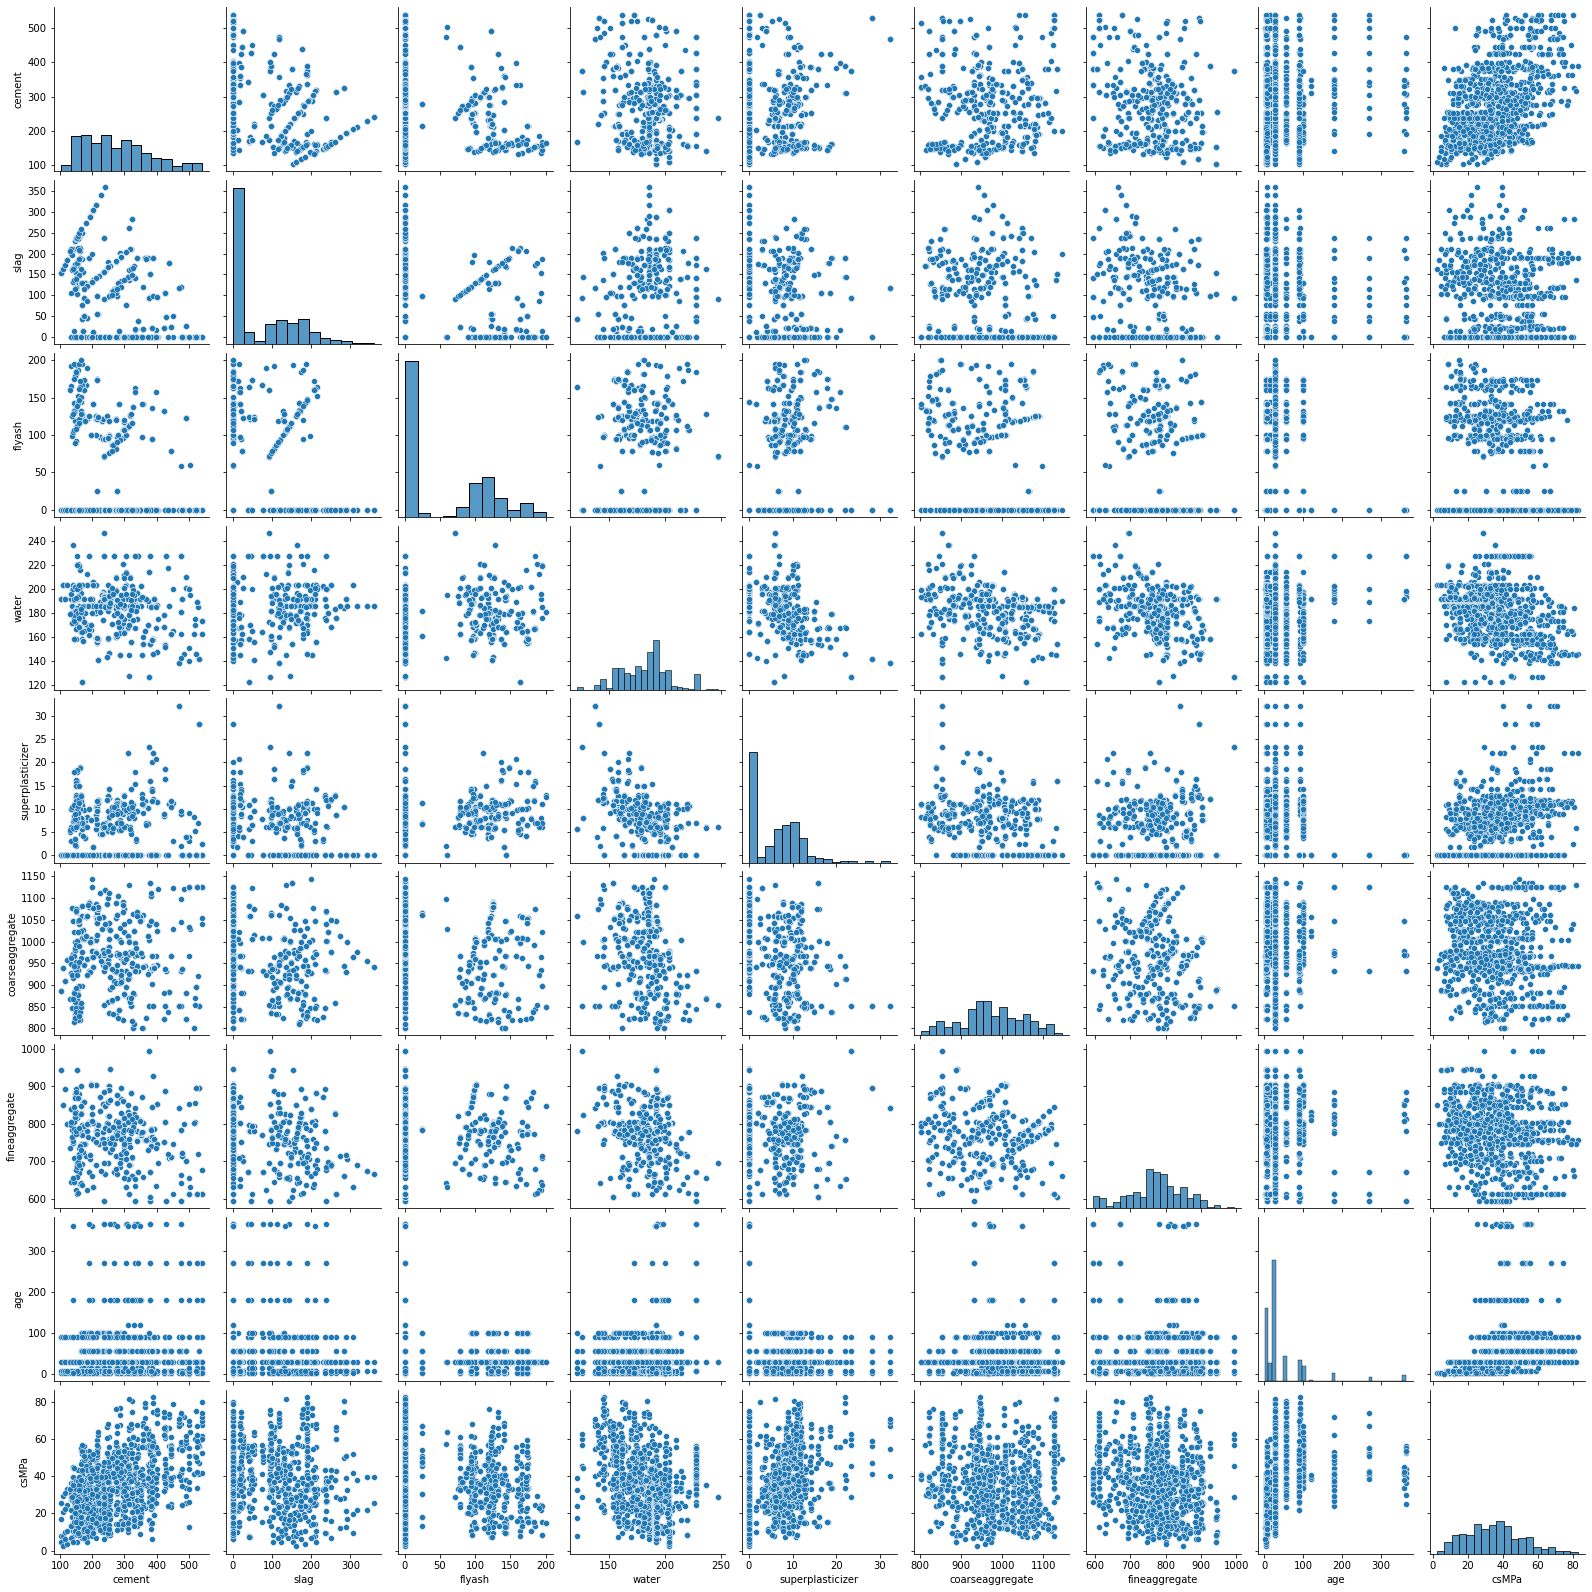

In [115]:
sns.pairplot(data=df1)
plt.show()

### Studying correlation
- To check the correlation between numerical variables, compute a correlation matrix and plot a heatmap for the correlation matrix

In [116]:
corr=df1.corr()
corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


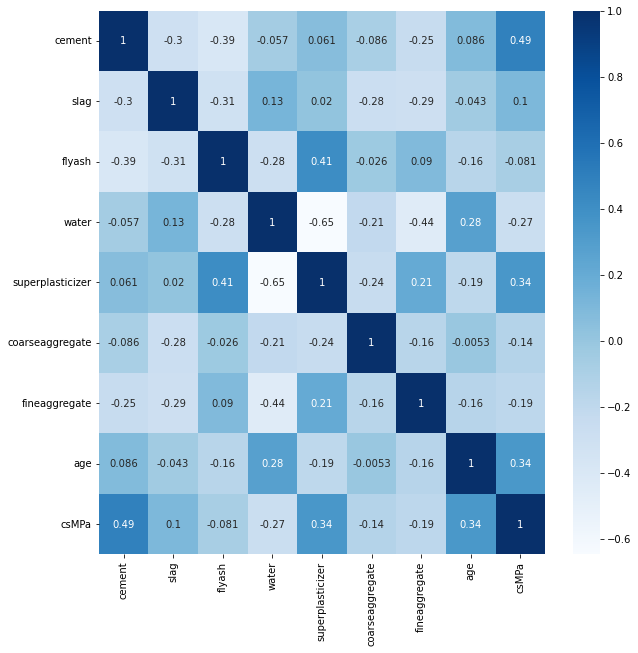

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [118]:
corr['csMPa'].sort_values(ascending=False)

csMPa               1.000000
cement              0.488283
superplasticizer    0.344209
age                 0.337367
slag                0.103374
flyash             -0.080648
coarseaggregate    -0.144717
fineaggregate      -0.186448
water              -0.269624
Name: csMPa, dtype: float64

#### Observations
- There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.
- Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.
- Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.

#### We can further analyze these correlations visually by plotting these relations.

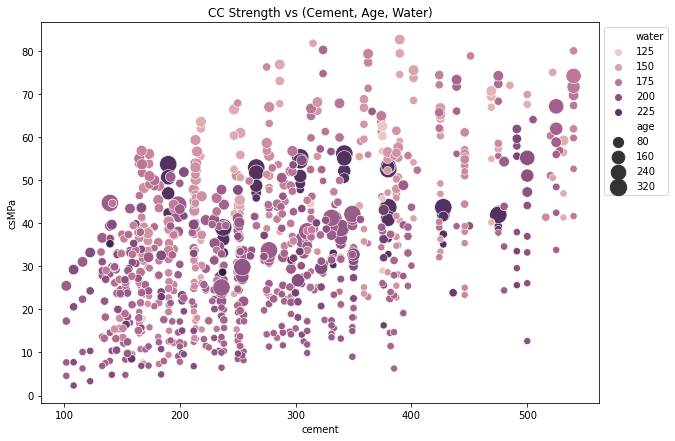

In [119]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=df1, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Observations from Strength vs (Cement, Age, Water)
- Compressive strength increases with amount of cement
- Compressive strength increases with age
- Cement with low age requires more cement for higher strength
- The older the cement is the more water it requires
- Concrete strength increases when less water is used in preparing it

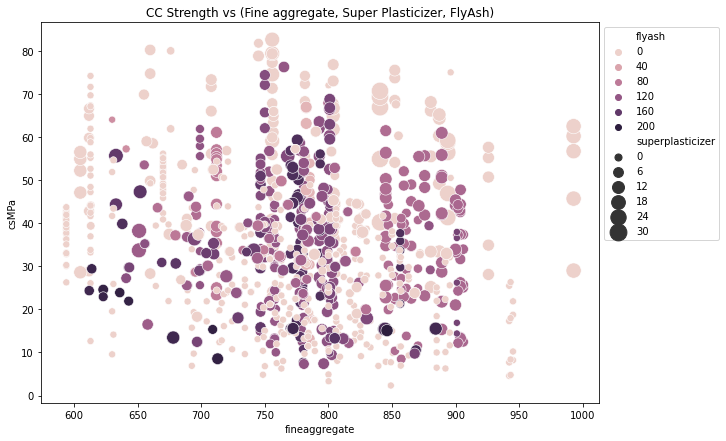

In [120]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=df1, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)
- As Flyash increases the strength decreases
- Strength increases with Super plasticizer

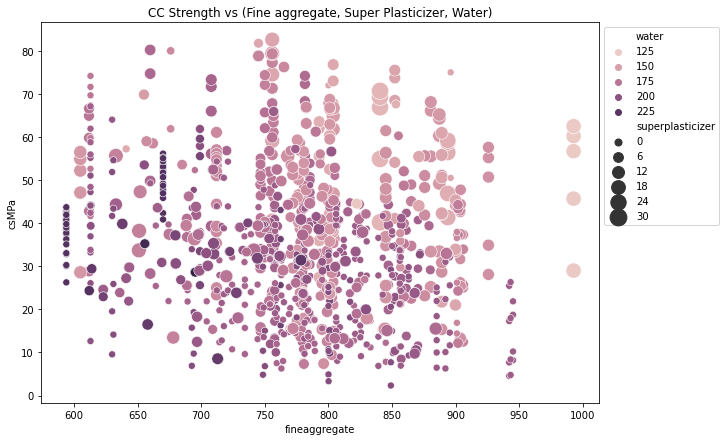

In [121]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="water", size="superplasticizer", 
                data=df1, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)
- Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
- More Fine aggregate is used when less water, more Super plasticizer is used.

### Handling upper and lower outliers at 3 and 97 percentile

### Outlier Clipping
1) 5 point summary<br>
2) 95% or 97% or 98% or 99% percentile as outliers

In [122]:
df1.describe(percentiles=[0.03,0.97])

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
3%,136.048000,0.000000,0.000000,143.300000,0.000000,824.000000,605.000000,3.000000,9.463200
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
97%,500.000000,250.200000,174.200000,228.000000,18.564000,1124.928000,903.800000,270.000000,68.720000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [123]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.97))
    x = x.clip(lower = x.quantile(0.03))
    return x

In [124]:
df1 = df1.apply(outlier_treatment)

In [125]:
df1.describe(percentiles=[0.97,0.03])

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.204565,70.809154,55.254328,182.294030,5.864860,974.540565,771.982985,44.000000,35.140964
std,101.799669,83.110039,63.644902,20.583318,5.403567,76.943713,77.514617,55.218671,15.727867
min,136.048000,0.000000,0.000000,143.300000,0.000000,824.000000,605.000000,3.000000,9.463200
3%,136.090240,0.000000,0.000000,143.300000,0.000000,824.000000,605.000000,3.000000,9.474816
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
97%,500.000000,250.200000,174.200000,228.000000,18.532320,1124.864640,903.800000,270.000000,68.693600
max,500.000000,250.200000,174.200000,228.000000,18.564000,1124.928000,903.800000,270.000000,68.720000


### Data Preprocessing
- Separating Input Features and Target Variable.



In [126]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
print(x.shape)
print(y.shape)

(1005, 8)
(1005,)


In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(753, 8)
(252, 8)
(753,)
(252,)


### Standardizing the data
- To rescale the features to have a mean of zero and standard deviation of 1.

In [128]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

### Model Building
Training Machine Learning Algorithms on the training data and making predictions on Test data.

#### Linear Regression
- The Go-to method for Regression problems.
- The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function.
- The objective function used in this case is Mean Squared Error.
- There are three versions of Linear Regression
   - Linear Regression - No regularisation
   - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
   - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)

### Creating Linear_Reg,Ridge_Reg,Lasso_Reg models and generate their prediction result.(Use alpha value in Ridge and Lasso)

In [129]:
def evaluate(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse,rmse, r_squared

In [130]:
models = pd.DataFrame(columns=["Model", "MAE", "MSE", "r2 Score",'RMSE'])
models

,Model,MAE,MSE,r2 Score,RMSE


### LinearRegression

In [131]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [132]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [133]:
# R2_score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.6554746547277005
Testing Score 0.609445435973817


In [134]:
ypred_m1= m1.predict(x_test)

In [135]:
mae, mse,rmse, r2 = evaluate(y_test, ypred_m1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 7.974473369482322
MSE: 101.7219417369803
RMSE: 10.085729608559824
r2 Score: 0.609445435973817


In [136]:
new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row,ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.08573


### OLS

In [137]:
import statsmodels.api as sm

In [138]:
X = x_train
Y = y_train

X = sm.add_constant(X)
m0 = sm.OLS(Y,X).fit()

m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  csMPa   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 20 Jul 2022   Prob (F-statistic):          1.73e-166
Time:                        20:57:07   Log-Likelihood:                -2734.5
No. Observations:                 753   AIC:                             5487.
Df Residuals:                     744   BIC:                             5529.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8986      0.335    104.159      0.000      34.241      35.556
x1            11.3062      0.892     12.674      0.000       9.555      13.058
x2             7.8961      0.904      8.736      0.000       6.122       9.671
x3             4.9303      0.823      5.990      0.000       3.314       6.546
x4            -3.6021      0.877     -4.107      0.000      -5.324      -1.880
x5             1.6918      0.601      2.815      0.005       0.512       2.871
x6             0.5228      0.757      0.691      0.490      -0.963       2.008
x7             1.0390      0.878      1.184      0.237      -0.684       2.762
x8             7.2942      0.353     20.657      0.000       6.601       7.987
==============================================================================
Omnibus:                        4.334   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                4.252
Skew:                          -0.183   Prob(JB):                        0.119
Kurtosis:                       3.035   Cond. No.                         8.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Lasso

In [139]:
m2 = Lasso(alpha=0.001)
m2.fit(x_train, y_train)
ypred_m2 = m2.predict(x_test)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 7.974686031052277
MSE: 101.72535025345415
RMSE: 10.085898584333185


In [140]:
print('Training Score',m2.score(x_train,y_train))
print('Testing Score',m2.score(x_test,y_test))

Training Score 0.6554742169590434
Testing Score 0.609432349203719


In [141]:
new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.974686,101.725350,0.609432,10.085899


### Ridge

In [142]:
m3 = Ridge(alpha=0.01)
m3.fit(x_train, y_train)
ypred_m3 = m3.predict(x_test)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m3)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 7.974495619234506
MSE: 101.72212224723066
RMSE: 10.085738557350703
r2 Score: 0.609444742916833


In [143]:
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.974686,101.725350,0.609432,10.085899
2,Ridge,7.974496,101.722122,0.609445,10.085739


### Polynomial_Regression(d=2)

In [144]:
from sklearn.preprocessing import PolynomialFeatures

In [145]:
poly = PolynomialFeatures(degree=2)
x_train_poly  = poly.fit_transform(x_train)
x_test_poly  = poly.fit_transform(x_test)

In [146]:
print(x_train_poly.shape)
print(x_test_poly.shape)
print(x_train.shape)
print(x_test.shape)

(753, 45)
(252, 45)
(753, 8)
(252, 8)


In [147]:
m4 = LinearRegression()
m4.fit(x_train_poly,y_train)
ypred_m4 = m4.predict(x_test_poly)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m4)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 5.810730529903548
MSE: 59.78464681257068
RMSE: 7.732053208079383
r2 Score: 0.7704608634809962


In [148]:
new_row = {"Model": "Poly_Reg(d=2)","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.974686,101.725350,0.609432,10.085899
2,Ridge,7.974496,101.722122,0.609445,10.085739
3,Poly_Reg(d=2),5.810731,59.784647,0.770461,7.732053


### Polynomial_Regression(d=3)

In [149]:
poly = PolynomialFeatures(degree=3)
x_train_poly  = poly.fit_transform(x_train)
x_test_poly  = poly.fit_transform(x_test)

In [150]:
print(x_train_poly.shape)
print(x_test_poly.shape)
print(x_train.shape)
print(x_test.shape)

(753, 165)
(252, 165)
(753, 8)
(252, 8)


In [151]:
m5 = LinearRegression()
m5.fit(x_train_poly,y_train)
ypred_m5 = m5.predict(x_test_poly)

mae, mse,rmse, r2 = evaluate(y_test, ypred_m5)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2 Score:", r2)

MAE: 4.356240937785868
MSE: 38.874774418623865
RMSE: 6.234963866665457
r2 Score: 0.8507429143071275


In [152]:
new_row = {"Model": "Poly_Reg(d=3)","MAE": mae, "MSE": mse, "r2 Score": r2, "RMSE": rmse}
models = models.append(new_row, ignore_index=True)
models

,Model,MAE,MSE,r2 Score,RMSE
0,LinearRegression,7.974473,101.721942,0.609445,10.085730
1,Lasso,7.974686,101.725350,0.609432,10.085899
2,Ridge,7.974496,101.722122,0.609445,10.085739
3,Poly_Reg(d=2),5.810731,59.784647,0.770461,7.732053
4,Poly_Reg(d=3),4.356241,38.874774,0.850743,6.234964


### Inference

While linear, lasso and ridge models perform the same; polynomial regression works the best for this data. With poly regression having degree 3 we seethat it has the highest r2 score and the lowest RMSE


### Plotting Predictions

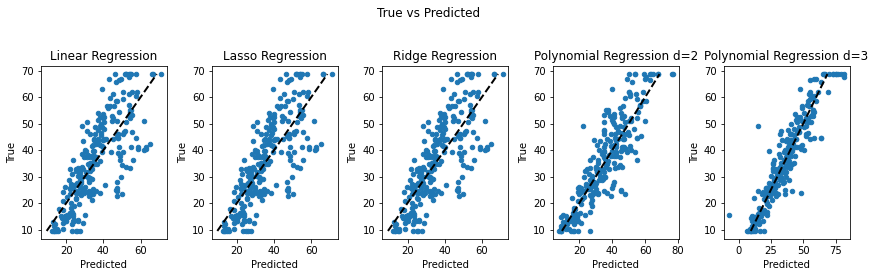

In [164]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1,5, figsize=(12,4))

ax1.scatter(ypred_m1, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(ypred_m2, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(ypred_m3, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

ax4.scatter(ypred_m4, y_test, s=20)
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_ylabel("True")
ax4.set_xlabel("Predicted")
ax4.set_title("Polynomial Regression d=2")

ax5.scatter(ypred_m5, y_test, s=20)
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_ylabel("True")
ax5.set_xlabel("Predicted")
ax5.set_title("Polynomial Regression d=3")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Conclusion
Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear, Lasso & Ridge Regression perform okayish as the predictions are close to the actual values. 

Polynomial Regression works the best here.(The closer the points are to the black line, the less the error is.)

